#Student Name: Murali Krishnan Rajasekharan Pillai
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [0]:
!nvidia-smi

Fri Sep  6 14:39:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [0]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

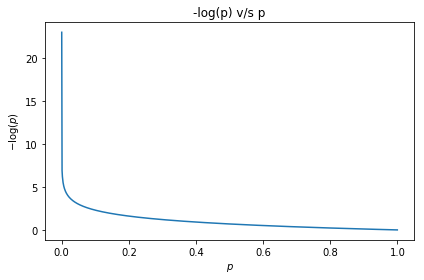

In [0]:
# Data lies in the range of [-3.,3.]
x = np.linspace(1e-10, 1., 1001)
neg_log_likelihood = -np.log(x)
fig, ax = plt.subplots()
ax.plot(x, neg_log_likelihood, label=r"$-log(p)$")

ax.set_title(r"-log(p) v/s p")
ax.set_ylabel(r"$-\log(p)$")
ax.set_xlabel(r"$p$")
fig.tight_layout()
plt.show()

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  $\textbf{ANS:}$  As can be seen from the above plot, the value of $-\log(p)$ increases when the value of $p$ is small, and reduces when $p$ is big. An interesting observation is that: 
  $$\lim_{p \to 0}(-\log(p)) \to \infty$$ 
  Similarly,
  $$\lim_{p \to 1}(-\log(p)) \to 0$$

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  $\textbf{ANS:}$ As observed above, the $-\log(p)$ function reaches high values when $p$ is small. Therefore, when the network assigns high probability to correct class labels, the negative log-probability assigns low cost and assigns high-cost to instances where the network assigns low probability to correct class labels.




#Part 2: Overfit CNN

In [0]:
n = 28 # Input is a 28 x 28 image
num_channels = 1 # Grey-scale image
num_classes = 10

In [0]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    model.add(Conv2D(256,
                    (3, 3),
                    activation="relu",
                    input_shape=(n, n, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Conv2D(128,
                    (3,3),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Flatten())
    
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer="normal"))
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    
    model.add(Dense(num_classes,
                   activation="softmax"))
    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model

In [0]:
#Create instance of CNN model graph
CNN_overfit = CNN_overfit()


In [0]:
#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

In [0]:
#Train the model and assign training meta-data to a variable
CNN_overfit_mdata = CNN_overfit.fit(data_train, labels_train,
                                   validation_data=(data_test, labels_test),
                                   epochs=200,
                                   batch_size=1024,
                                   shuffle=True)


W0905 23:24:34.589749 140466257110912 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 14s 238us/step - loss: 0.9379 - acc: 0.6630 - val_loss: 0.5644 - val_acc: 0.7867
Epoch 2/200
60000/60000 [==============================] - 11s 191us/step - loss: 0.4847 - acc: 0.8231 - val_loss: 0.4425 - val_acc: 0.8392
Epoch 3/200
60000/60000 [==============================] - 11s 191us/step - loss: 0.3994 - acc: 0.8567 - val_loss: 0.3939 - val_acc: 0.8607
Epoch 4/200
60000/60000 [==============================] - 12s 192us/step - loss: 0.3576 - acc: 0.8726 - val_loss: 0.3613 - val_acc: 0.8703
Epoch 5/200
60000/60000 [==============================] - 12s 193us/step - loss: 0.3304 - acc: 0.8813 - val_loss: 0.3411 - val_acc: 0.8759
Epoch 6/200
60000/60000 [==============================] - 12s 194us/step - loss: 0.3050 - acc: 0.8908 - val_loss: 0.3288 - val_acc: 0.8812
Epoch 7/200
60000/60000 [==============================] - 12s 193us/step - loss: 0.2907 - acc: 0.8937 - val_l

In [0]:
#Print accuracy of model on testing set after training 
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%"%(scores[1]*100))

10000/10000 [==============================] - 1s 143us/step
Accuracy: 91.45%


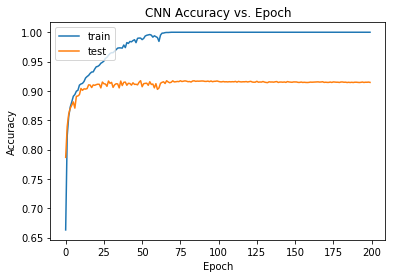

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_overfit_mdata.history['acc'])
plt.plot(CNN_overfit_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

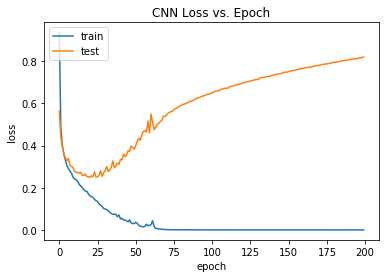

In [0]:
#Plot loss vs epoch
plt.plot(CNN_overfit_mdata.history['loss'])
plt.plot(CNN_overfit_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

 $\textbf{ANS: }$ The loss of the training set goes to 0.

2.   What does the loss of the testing set go to? 

  $\textbf{ANS: }$ The loss of the testing set approaches 0.8 towards the end of 200 epochs.
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  $\textbf{ANS: }$ The neural netowrk is able to perfectly classify the instances of data from the training set. This is relected by the training loss limiting to 0. However, the testing loss doesn't reflect the same trend. This is because the neural network cannot generalize into instances of data that wasn't present in training (aka, tuning of the parameters).  

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  $\textbf{ANS: }$ As mentioned in the previous question, this problem arises when the neural netowrk cannot generalize into new instances of data. This problem is defined as __overfitting__. There are many ways to mitigate overfitting of data. Some of the methods are:
  - Use regularisation.
  - Use dropout regularization for the input/hidden layers 

#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()
    model.add(Dropout(0.30))
    model.add(Conv2D(256,
                    (3, 3),
                    activation='relu',
                    input_shape=(n, n, num_channels)))
    
    model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Conv2D(128,
                    (3, 3),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(num_classes,
                   activation='softmax'))
    return model

In [0]:
#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

In [0]:
#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

In [0]:
#Train the model and assign training meta-data to a variable
CNN_dropout_in_mdata = CNN_dropout_in.fit(data_train, labels_train,
                                   validation_data=(data_test, labels_test),
                                   epochs=200,
                                   batch_size=1024,
                                   shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 201us/step - loss: 0.9617 - acc: 0.6434 - val_loss: 0.6898 - val_acc: 0.7487
Epoch 2/200
60000/60000 [==============================] - 12s 193us/step - loss: 0.5692 - acc: 0.7844 - val_loss: 0.5914 - val_acc: 0.7898
Epoch 3/200
60000/60000 [==============================] - 12s 194us/step - loss: 0.4870 - acc: 0.8179 - val_loss: 0.5390 - val_acc: 0.8106
Epoch 4/200
60000/60000 [==============================] - 12s 194us/step - loss: 0.4426 - acc: 0.8365 - val_loss: 0.5036 - val_acc: 0.8245
Epoch 5/200
60000/60000 [==============================] - 12s 194us/step - loss: 0.4135 - acc: 0.8478 - val_loss: 0.4757 - val_acc: 0.8370
Epoch 6/200
60000/60000 [==============================] - 12s 193us/step - loss: 0.3913 - acc: 0.8548 - val_loss: 0.4674 - val_acc: 0.8368
Epoch 7/200
60000/60000 [==============================] - 12s 192us/step - loss: 0.3778 - acc: 0.8594 - val_l

In [0]:
#Print accuracy of model on testing set after training 
scores = CNN_dropout_in.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%"%(scores[1]*100))

10000/10000 [==============================] - 1s 147us/step
Accuracy: 88.07%


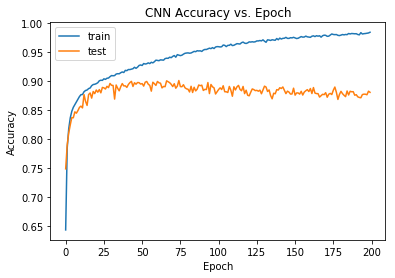

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_in_mdata.history['acc'])
plt.plot(CNN_dropout_in_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

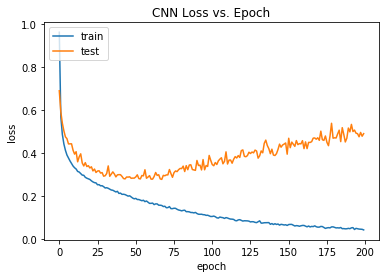

In [0]:
#Plot loss vs epoch
plt.plot(CNN_dropout_in_mdata.history['loss'])
plt.plot(CNN_dropout_in_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  $\textbf{ANS: }$ The loss of the training set reaches 0.0433 at the end of 200 epochs. (Accuracy - 98.43 %)
  
2.   What does the loss of the testing set go to? 

  $\textbf{ANS: }$  The loss of the testing set reaches 0.4906 at the end of 200 epochs. (Accuracy - 88.07%)

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  $\textbf{ANS: }$   When using Dropout in the input layer, we are de-activating certain inputs into the training. This might not be the best course of action, as this is equivalent to ignoring the data. This might explain the difference in the loss of training set and that of the testing set.

#Part 4: Dropout on Hidden Layers

In [0]:
n = 28
num_channels = 1
num_outputs = 10

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()
    model.add(Conv2D(256,
                    (3, 3),
                    activation='relu',
                    input_shape=(n, n, num_channels)))
    model.add(Dropout(0.30))
    model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Conv2D(128,
                    (3, 3),
                    activation='relu'))
    model.add(Dropout(0.30))
    model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(num_outputs,
                   activation='softmax'))
    
    return model

In [0]:
#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

In [0]:
#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss='categorical_crossentropy',
                          optimizer='Adam',
                          metrics=['accuracy'])

In [0]:
#Train the model and assign training meta-data to a variable
CNN_dropout_hidden_mdata = CNN_dropout_hidden.fit(data_train, labels_train,
                                                 validation_data=(data_test, labels_test),
                                                 epochs=200,
                                                 batch_size=1024,
                                                 shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 337us/step - loss: 0.8795 - acc: 0.6857 - val_loss: 0.6728 - val_acc: 0.7849
Epoch 2/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.4782 - acc: 0.8249 - val_loss: 0.5662 - val_acc: 0.8037
Epoch 3/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.4006 - acc: 0.8555 - val_loss: 0.4703 - val_acc: 0.8568
Epoch 4/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.3590 - acc: 0.8708 - val_loss: 0.4302 - val_acc: 0.8760
Epoch 5/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.3246 - acc: 0.8828 - val_loss: 0.4026 - val_acc: 0.8777
Epoch 6/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.3096 - acc: 0.8880 - val_loss: 0.3903 - val_acc: 0.8775
Epoch 7/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.2919 - acc: 0.8947 - val_l

In [0]:
#Print accuracy of model on testing set after training 
scores = CNN_dropout_hidden.evaluate(data_test, labels_test)

10000/10000 [==============================] - 2s 155us/step


In [0]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 92.36%


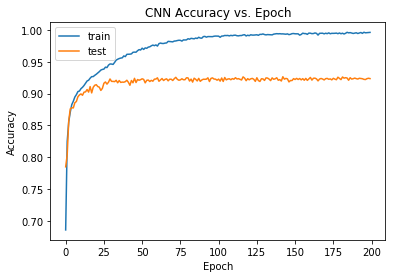

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_hidden_mdata.history['acc'])
plt.plot(CNN_dropout_hidden_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

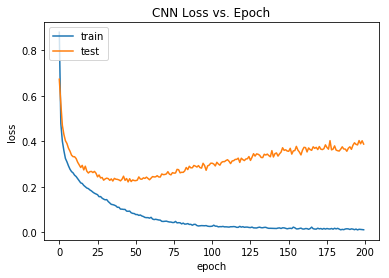

In [0]:
#Plot loss vs epoch
plt.plot(CNN_dropout_hidden_mdata.history['loss'])
plt.plot(CNN_dropout_hidden_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  $\textbf{ANS: }$ The training set loss reaches 0.0109 at the end of 200 epochs. (Accuracy - 99.6 %)
  
2.   What does the loss of the testing set go to? 

  $\textbf{ANS: }$ The testing set loss reaches 0.3877 at the end of 200 epochs.
  (Accuracy - 92.36 %)

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  $\textbf{ANS: }$ Using Droput in the hidden layers help with regularizing the parameters (aka, the training weights). This helps to prevent the pverfit of the data, which is corroborated by similar accuray in the training & testing set. This shows that the model is able to perform similar on the testing data, as it does on the training set.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  $\textbf{ANS: }$ The model has an accuracy of 99.6% in the training set, while it has an accuracy of 92.36% in the testing set. Yes, this model is a good fit to the data.

#Part 5: Dropout on Input and Hidden Layers

In [0]:
n = 28
num_channels = 1
num_classes = 10

In [0]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Dropout(0.30))
    model.add(Conv2D(256,
                    (3, 3),
                    activation='relu',
                    input_shape=(n, n, num_channels)))
    model.add(Dropout(0.30))
    model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Conv2D(128,
                    (3, 3),
                    activation='relu'))
    model.add(Dropout(0.30))
    model.add(MaxPooling2D(pool_size=(2, 2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    model.add(Flatten())
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(100,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(num_classes,
                   activation='softmax'))
    
    return model

In [0]:
#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

In [0]:
#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss='categorical_crossentropy',
                        optimizer='Adam',
                        metrics=['accuracy'])

In [0]:
#Train the model and assign training meta-data to a variable
CNN_dropout_both_mdata = CNN_dropout_both.fit(data_train, labels_train,
                                                 validation_data=(data_test, labels_test),
                                                 epochs=200,
                                                 batch_size=1024,
                                                 shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 335us/step - loss: 0.9085 - acc: 0.6647 - val_loss: 0.8187 - val_acc: 0.7660
Epoch 2/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.5435 - acc: 0.7925 - val_loss: 0.7735 - val_acc: 0.7804
Epoch 3/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.4768 - acc: 0.8229 - val_loss: 0.6587 - val_acc: 0.8231
Epoch 4/200
60000/60000 [==============================] - 19s 322us/step - loss: 0.4359 - acc: 0.8377 - val_loss: 0.6349 - val_acc: 0.8454
Epoch 5/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.4043 - acc: 0.8526 - val_loss: 0.5837 - val_acc: 0.8488
Epoch 6/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3930 - acc: 0.8541 - val_loss: 0.5906 - val_acc: 0.8425
Epoch 7/200
60000/60000 [==============================] - 19s 323us/step - loss: 0.3757 - acc: 0.8596 - val_l

In [0]:
#Print accuracy of model on testing set after training 
scores = CNN_dropout_both.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%"%(scores[1]*100))

10000/10000 [==============================] - 2s 157us/step
Accuracy: 85.40%


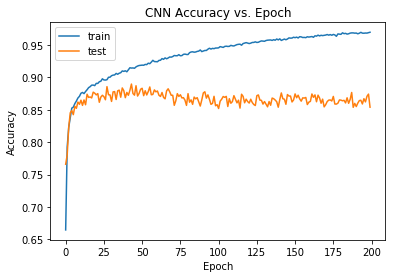

In [0]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_mdata.history['acc'])
plt.plot(CNN_dropout_both_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

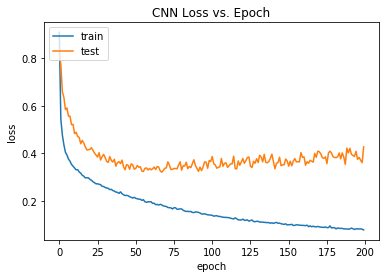

In [0]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_mdata.history['loss'])
plt.plot(CNN_dropout_both_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: The loss of the training set goes to 0.0781 at the end of 200 epochs.(Accuracy -> 96.97 %)
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set goes to 0.4268 at the end of 200 epochs. (Accuracy -> 85.40 %)
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: The model achieved an accuracy of 96.97% with the training dataset, but only achieved 85.40% acuracy in the testing set. There is a difference of 11.5 % points difference in the model accuracies.
  
4.   Compare the plots obtained in this part to the plots from Part 4. Did using dropout in the input layer, in addition to using dropout in the hidden layers as in Part 4, significantly increase the robustness of your model? 

  ANS: The model in Part 4 performed better than the model in Part 5. Adding dropout to the input layer actually reduced the accuracy of the model. 

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [0]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-09-06 02:50:06--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  12.4MB/s    in 94s     

2019-09-06 02:51:40 (12.6 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [0]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    model.add(Conv2D(256,
                    (1, 3),
                    activation='relu',
                    input_shape=(2, 128, 1)))
    model.add(Dropout(0.20))
    model.add(Conv2D(256,
                    (2, 3),
                    activation='relu'))
    model.add(Conv2D(80,
                    (1, 3),
                    activation='relu'))
    model.add(Dropout(0.20))
    model.add(Conv2D(80,
                    (1, 3),
                    activation='relu'))
    model.add(Reshape((16, 600)))
    model.add(LSTM(50))
    
    model.add(Dense(128,
                   activation='relu',
                   kernel_initializer='normal'))
    model.add(Dense(10,
                   activation='softmax'))    
    return model

In [0]:
#Create instance of CNN model graph
cldnn = cldnn()

In [0]:
#Compile model using an appropriate loss and optimizer algorithm
cldnn.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [0]:
#Train the model and assign training meta-data to a variable
cldnn_mdata = cldnn.fit(X_train, Y_train,
                       validation_data=(X_test, Y_test),
                       epochs=100,
                       batch_size=1024,
                       shuffle=True)

Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 180s 416us/step - loss: 1.4349 - acc: 0.3900 - val_loss: 1.0584 - val_acc: 0.5081
Epoch 2/100
432000/432000 [==============================] - 175s 404us/step - loss: 0.6043 - acc: 0.7098 - val_loss: 0.5020 - val_acc: 0.7401
Epoch 3/100
432000/432000 [==============================] - 175s 404us/step - loss: 0.4644 - acc: 0.7614 - val_loss: 0.4367 - val_acc: 0.7733
Epoch 4/100
432000/432000 [==============================] - 176s 408us/step - loss: 0.4000 - acc: 0.7868 - val_loss: 0.3795 - val_acc: 0.7952
Epoch 5/100
432000/432000 [==============================] - 176s 407us/step - loss: 0.3565 - acc: 0.8050 - val_loss: 0.3403 - val_acc: 0.8149
Epoch 6/100
432000/432000 [==============================] - 176s 408us/step - loss: 0.3338 - acc: 0.8172 - val_loss: 0.3141 - val_acc: 0.8283
Epoch 7/100
432000/432000 [==============================] - 176s 408us/step - loss: 0.323

In [0]:
#Print accuracy of model on testing set after training 
scores = cldnn.evaluate(X_test, Y_test)

108000/108000 [==============================] - 69s 641us/step


In [0]:
print("Accuracy : %.2f%%" %(scores[1]*100))

Accuracy : 92.16%


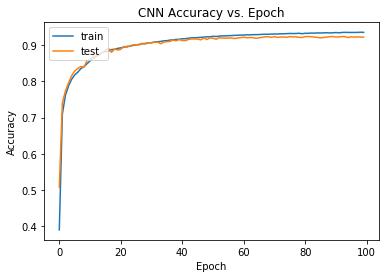

In [0]:
#Plot accuracy vs epoch
plt.plot(cldnn_mdata.history['acc'])
plt.plot(cldnn_mdata.history['val_acc'])
plt.title('CNN Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

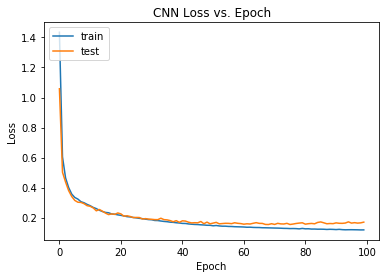

In [0]:
#Plot loss vs epoch
#Plot accuracy vs epoch
plt.plot(cldnn_mdata.history['loss'])
plt.plot(cldnn_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  $\textbf{ANS: }$ Yes, the model seems to be a good fit for the data. As can be seen from the Accuracy and Loss plots. The model performs similarly to the testing set and to the training set. 

2.   Give two ways to improve the robustness of the model.

  $\textbf{ANS: }$  Some ways we can improve the robustness of the model:
  - Increase the time-steps unrolled by the LSTM layer. Hence become robust to temporal differences
  - Train for more number of epochs untill the variation of loss/accuracy is very small